## Dash Components

### Objectives

After completing the lab you will be able to:

Work with Dash Callbacks

### Dataset used 
Airline Reporting Carrier On-Time Performance 

In [2]:
# Import required libraries and read the dataset
# Import required libraries
import pandas as pd
import plotly.graph_objects as go
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

# Read the airline data into pandas dataframe
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

In [3]:
airline_data.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1295781,1998,2,4,2,4,1998-04-02,AS,19930,AS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1125375,2013,2,5,13,1,2013-05-13,EV,20366,EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118824,1993,3,9,25,6,1993-09-25,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,634825,1994,4,11,12,6,1994-11-12,HP,19991,HP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1888125,2017,3,8,17,4,2017-08-17,UA,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Create an application layout
# Create a dash application
# Add an input text box using core input component
app = dash.Dash(__name__)

# Get the layout of the application and adjust it.
# Create an outer division using html.Div and add title to the dashboard using html.H1 component
app.layout = html.Div(children=[html.H1('Airline Performance Dashboard',
                                       style={'textAlign': 'center', 'color': '#503D36','font-size': 40}
                                       ),
                                # Add a html.Div and core input text component
                                html.Div(["Input Year", 
                                          dcc.Input(id = 'input-year',value = '2010',
                                                   type ={'number',style='height':'50px', 'font-size': 35}
                                                   ),], 
                                style={'font-size': 40}}),
                                html.Br(),
                                html.Br(),
                                # Finally, add graph component.
                                html.Div(dcc.Graph(id='line-plot')),
                                ])
# add callback decorator
@app.callback( Output(component_id='line-plot', component_property='figure'),
               Input(component_id='input-year', component_property='value'))

# Add computation to callback function and return graph
def get_graph(entered_year):
    # Select 2019 data
    df =  airline_data[airline_data['Year']==int(entered_year)]

    # Group the data by Month and compute average over arrival delay time.
    line_data = df.groupby('Month')['ArrDelay'].mean().reset_index()

    fig = go.Figure(data=go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines', marker=dict(color='green')))
    fig.update_layout(title='Month vs Average Flight Delay Time', xaxis_title='Month', yaxis_title='ArrDelay')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server()

#### Stop the running application 
Press ctrl+c inside the terminal to stop the dash application.


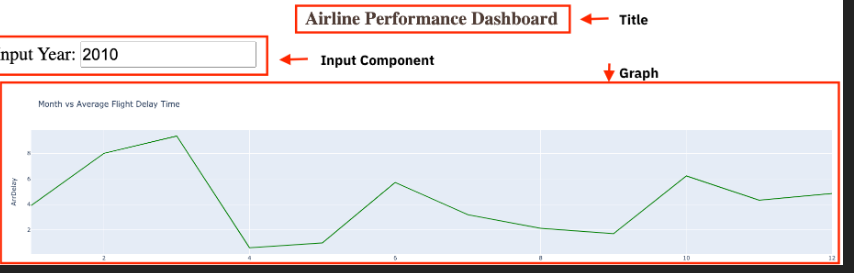